In [62]:
#importing the dependencies

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [64]:
#importing the data from a csv file into a pandas dataframe

In [65]:
tips_df = pd.read_csv('https://raw.githubusercontent.com/Sofya27/Waiter-Tips/main/tips.csv')

In [66]:
#tips_df

In [67]:
#taking a peek at the dataset
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<ipython-input-68-9204a91e8fe2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips_df.corr())


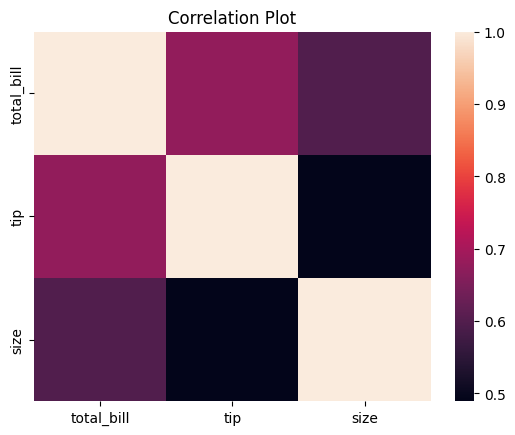

In [68]:
#making a correlation matrix

sns.heatmap(tips_df.corr())
plt.title('Correlation Plot')
plt.show()

In [69]:
#seeing what features we have
tips_df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [70]:
#how much data we have
tips_df.shape

(244, 7)

In [71]:
#what data types do we have
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [72]:
#are there any missing values
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [73]:
#how does sex vary?
print(tips_df.sex.value_counts())

Male      157
Female     87
Name: sex, dtype: int64


In [74]:
#how does smoker type vary?
print(tips_df.smoker.value_counts())

No     151
Yes     93
Name: smoker, dtype: int64


In [75]:
#how does day of the week vary?
print(tips_df.day.value_counts())

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


In [76]:
#how does time of the meal vary?
print(tips_df.time.value_counts())

Dinner    176
Lunch      68
Name: time, dtype: int64


In [77]:
#how does size of the party vary?
print(tips_df['size'].value_counts())

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


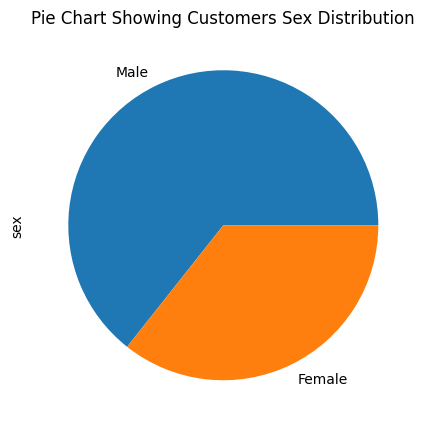

In [78]:
#visualizing the distribution of sex
data =  tips_df.sex.value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Customers Sex Distribution')
plt.show()

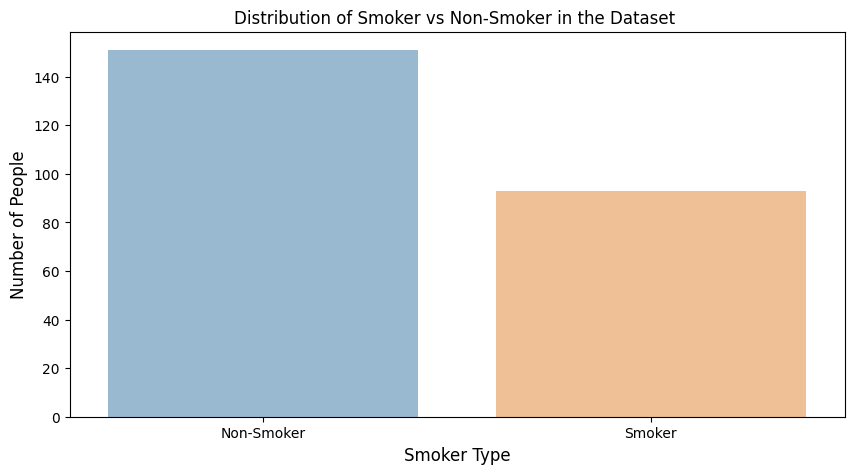

In [79]:
#visualizing the distribution of smoker type
smoker_count  = tips_df.smoker.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = smoker_count.index, y= smoker_count.values,  alpha=0.5)

#changing labels: Yes to Smoker and No to Non-Smoker
plt.gca().set_xticklabels(['Non-Smoker', 'Smoker'])

plt.title('Distribution of Smoker vs Non-Smoker in the Dataset ')
plt.ylabel('Number of People', fontsize=12)
plt.xlabel('Smoker Type', fontsize=12)
plt.show()

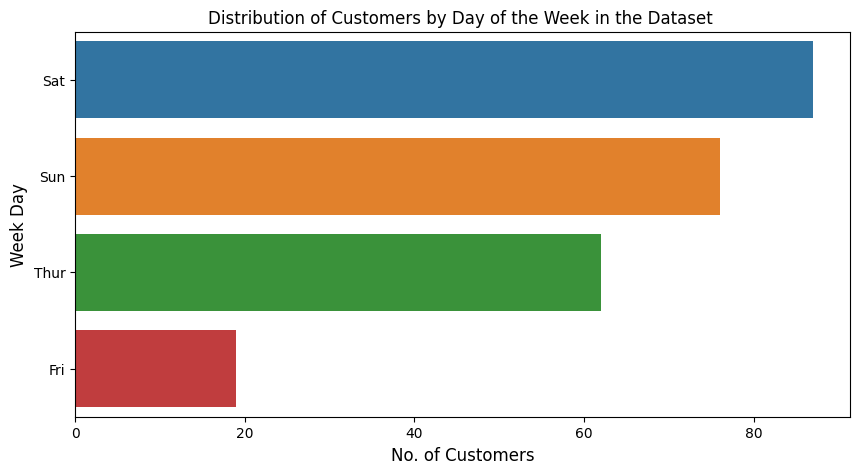

In [80]:
#visualizing the distribution of days
day_count  = tips_df.day.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= day_count.values, y = day_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Customers by Day of the Week in the Dataset ')
plt.ylabel('Week Day', fontsize=12)
plt.xlabel('No. of Customers', fontsize=12)
plt.show()

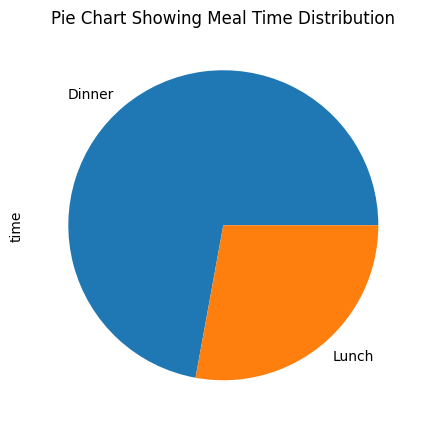

In [81]:
#visualizing the distribution of meal time
data =  tips_df.time.value_counts()
plt.figure(figsize=(5,10))
data.plot.pie( title = 'Pie Chart Showing Meal Time Distribution')
plt.show()

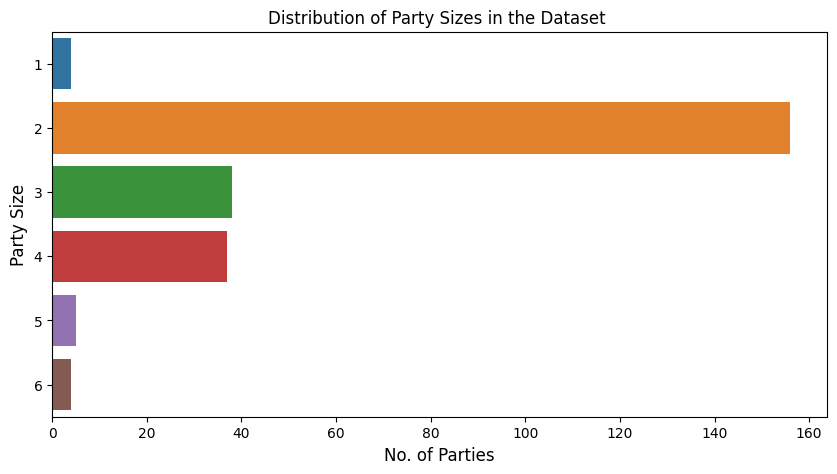

In [82]:
#visualizing the distribution of days
size_count  = tips_df['size'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x= size_count.values, y = size_count.index,   alpha=1, orient = 'h')
plt.title('Distribution of Party Sizes in the Dataset ')
plt.ylabel('Party Size', fontsize=12)
plt.xlabel('No. of Parties', fontsize=12)
plt.show()

In [83]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [84]:
#doing one-hot encoding for the categorical columns - sex, smoker, day, time

In [85]:
#encoding sex
sex_encoding = pd.get_dummies(tips_df['sex'], drop_first=True)

In [86]:
sex_encoding

,Male
0,0
1,1
2,1
3,1
4,0
...,...
239,1
240,0
241,1
242,1


In [87]:
#droping the original sex column and joining the encoded sex column

In [88]:
tips_df = tips_df.drop('sex', axis = 1)

In [89]:
#tips_df

In [90]:
tips_df = tips_df.join(sex_encoding)

In [91]:
tips_df

,total_bill,tip,smoker,day,time,size,Male
0,16.99,1.01,No,Sun,Dinner,2,0
1,10.34,1.66,No,Sun,Dinner,3,1
2,21.01,3.50,No,Sun,Dinner,3,1
3,23.68,3.31,No,Sun,Dinner,2,1
4,24.59,3.61,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1
240,27.18,2.00,Yes,Sat,Dinner,2,0
241,22.67,2.00,Yes,Sat,Dinner,2,1
242,17.82,1.75,No,Sat,Dinner,2,1


In [92]:
#encoding smoker column

#renaiming Yes and No to have a clear understanding after encoding
tips_df['smoker'] = tips_df['smoker'].replace({'Yes':'smoker', 'No':'non-smoker'})

In [93]:
tips_df

,total_bill,tip,smoker,day,time,size,Male
0,16.99,1.01,non-smoker,Sun,Dinner,2,0
1,10.34,1.66,non-smoker,Sun,Dinner,3,1
2,21.01,3.50,non-smoker,Sun,Dinner,3,1
3,23.68,3.31,non-smoker,Sun,Dinner,2,1
4,24.59,3.61,non-smoker,Sun,Dinner,4,0
...,...,...,...,...,...,...,...
239,29.03,5.92,non-smoker,Sat,Dinner,3,1
240,27.18,2.00,smoker,Sat,Dinner,2,0
241,22.67,2.00,smoker,Sat,Dinner,2,1
242,17.82,1.75,non-smoker,Sat,Dinner,2,1


In [94]:
smoker_encoding = pd.get_dummies(tips_df['smoker'], drop_first=True)

In [95]:
smoker_encoding

,smoker
0,0
1,0
2,0
3,0
4,0
...,...
239,0
240,1
241,1
242,0


In [96]:
tips_df = tips_df.drop('smoker', axis=1)

In [97]:
#tips_df

In [98]:
tips_df = tips_df.join(smoker_encoding)

In [99]:
tips_df

,total_bill,tip,day,time,size,Male,smoker
0,16.99,1.01,Sun,Dinner,2,0,0
1,10.34,1.66,Sun,Dinner,3,1,0
2,21.01,3.50,Sun,Dinner,3,1,0
3,23.68,3.31,Sun,Dinner,2,1,0
4,24.59,3.61,Sun,Dinner,4,0,0
...,...,...,...,...,...,...,...
239,29.03,5.92,Sat,Dinner,3,1,0
240,27.18,2.00,Sat,Dinner,2,0,1
241,22.67,2.00,Sat,Dinner,2,1,1
242,17.82,1.75,Sat,Dinner,2,1,0


In [100]:
#encoding day column
day_encoding = pd.get_dummies(tips_df['day'])

In [101]:
day_encoding

,Fri,Sat,Sun,Thur
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
239,0,1,0,0
240,0,1,0,0
241,0,1,0,0
242,0,1,0,0


In [102]:
#droping original day column and adding encoded column
tips_df = tips_df.drop('day', axis = 1)
tips_df = tips_df.join(day_encoding)

In [103]:
tips_df

,total_bill,tip,time,size,Male,smoker,Fri,Sat,Sun,Thur
0,16.99,1.01,Dinner,2,0,0,0,0,1,0
1,10.34,1.66,Dinner,3,1,0,0,0,1,0
2,21.01,3.50,Dinner,3,1,0,0,0,1,0
3,23.68,3.31,Dinner,2,1,0,0,0,1,0
4,24.59,3.61,Dinner,4,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Dinner,3,1,0,0,1,0,0
240,27.18,2.00,Dinner,2,0,1,0,1,0,0
241,22.67,2.00,Dinner,2,1,1,0,1,0,0
242,17.82,1.75,Dinner,2,1,0,0,1,0,0


In [104]:
#encoding time column
time_encoding = pd.get_dummies(tips_df['time'], drop_first=True)

In [105]:
time_encoding

,Lunch
0,0
1,0
2,0
3,0
4,0
...,...
239,0
240,0
241,0
242,0


In [106]:
#droping original time column, joining time encoding
tips_df = tips_df.drop('time', axis=1)
tips_df = tips_df.join(time_encoding)


In [107]:
#one-hot encoding is completed
tips_df

,total_bill,tip,size,Male,smoker,Fri,Sat,Sun,Thur,Lunch
0,16.99,1.01,2,0,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,0,1,0,0
2,21.01,3.50,3,1,0,0,0,1,0,0
3,23.68,3.31,2,1,0,0,0,1,0,0
4,24.59,3.61,4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,0
240,27.18,2.00,2,0,1,0,1,0,0,0
241,22.67,2.00,2,1,1,0,1,0,0,0
242,17.82,1.75,2,1,0,0,1,0,0,0


In [108]:
#separating data into features (X) and label/targets(y)
X = tips_df.drop(['tip'], axis = 1)
y = tips_df['tip']

In [109]:
#taking a look at feature set
print(X)

     total_bill  size  Male  smoker  Fri  Sat  Sun  Thur  Lunch
0         16.99     2     0       0    0    0    1     0      0
1         10.34     3     1       0    0    0    1     0      0
2         21.01     3     1       0    0    0    1     0      0
3         23.68     2     1       0    0    0    1     0      0
4         24.59     4     0       0    0    0    1     0      0
..          ...   ...   ...     ...  ...  ...  ...   ...    ...
239       29.03     3     1       0    0    1    0     0      0
240       27.18     2     0       1    0    1    0     0      0
241       22.67     2     1       1    0    1    0     0      0
242       17.82     2     1       0    0    1    0     0      0
243       18.78     2     0       0    0    0    0     1      0

[244 rows x 9 columns]


In [110]:
#taking a look at our targets (label)
print(y)

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [111]:
#splitting the dataset into training and test sets in the ratio 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=2)

In [112]:
#creating the model and fitting (training) on the training data
from sklearn.linear_model import LinearRegression

#Loading the Linear Regression Model
LR = LinearRegression()
#fitting the model
LR.fit(X_train, y_train)

LinearRegression()

In [113]:
#making predictions on the test data
y_pred = LR.predict(X_test)

In [114]:
#calculating the coeeficients
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 0.09224476  0.07244892  0.03816451  0.05642428 -0.02046687 -0.02939412
  0.31188516 -0.26202418  0.28435021]


In [115]:
#calculating the intercept
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 0.8283490401241607


In [116]:
#calculating r squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.5265780310704977


In [117]:
#calculating mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.8987509746442534


In [118]:
#calculating root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.9480247753325086


In [119]:
#calculating mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 0.6767680278638182


In [120]:
y_pred

array([4.35335587, 3.82597054, 1.81966281, 2.51463883, 3.53255864,
       4.48752849, 2.24020949, 2.90674104, 3.73614896, 5.58510454,
       2.27065027, 2.67705158, 2.98563662, 2.59091979, 1.86295476,
       3.50765255, 2.59719673, 2.50780875, 2.10755836, 2.87936597,
       2.79437681, 2.42792876, 3.2738752 , 2.81030849, 2.98789008,
       2.46127912, 2.63504344, 3.16826537, 2.14031427, 2.20702773,
       2.93389012, 3.04073122, 2.14217533, 3.36172466, 3.57155632,
       4.7632037 , 3.92543206, 2.209514  , 2.65312188, 3.72919383,
       4.574157  , 3.8524784 , 2.6799623 , 3.0882477 , 2.34914775,
       2.76979434, 5.63546979, 2.17732023, 2.56964374, 2.51115438,
       3.29187336, 5.120246  , 2.49111525, 4.2724352 , 3.27722197,
       2.13228312, 2.98372864, 2.7457108 , 2.75646237, 3.68769283,
       2.92297459, 4.31771656, 3.80106445, 2.86537428, 3.33380795,
       2.60708894, 1.54017838, 2.11207871, 1.91092204, 3.65758707,
       1.97549337, 2.04531832, 2.30261813, 3.3419208 ])

In [121]:
#export the model as a pickle
import pickle

with open('waiter_tips_prediction_model.pkl', 'wb') as f:
  pickle.dump(LR, f)

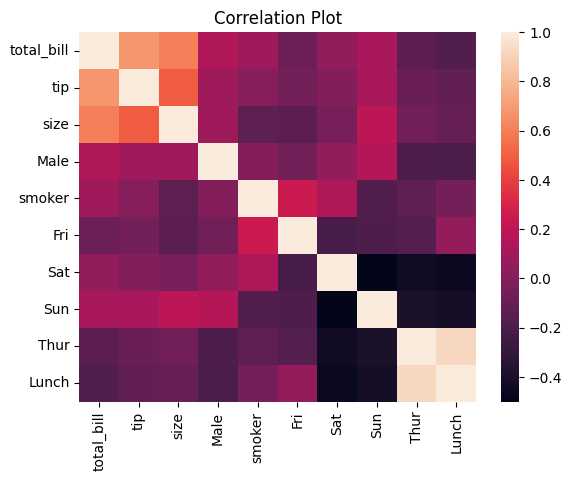

In [122]:
#checking correlation heatmap one more time
sns.heatmap(tips_df.corr())
plt.title('Correlation Plot')
plt.show()